# Build Multilayer Perceptron Models with Keras

In [1]:
# Task 1: Project Overview and Import Libraries
# Task 2: Load the Reuters Dataset
# Task 3: Vectorize Sequences and One-hot Encode Class Labels
# Task 4: Build Multilayer Perceptron Model
# Task 5: Train Model
# Task 6: Evaluate Model on Test Data

# Task 1: Project Overview and Import Modules

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

np.random.seed(0)

import tensorflow as tf

from tensorflow.keras.datasets import reuters

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation

from tensorflow.keras.preprocessing.text import Tokenizer
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.0.0


# Task 2: Load the Reuters Dataset

In [5]:
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=10000,test_split=0.2)

In [6]:
print(len(x_train), 'training examples')
print(len(x_test), 'training examples')

8982 training examples
2246 training examples


In [9]:
num_class = np.max(y_train)+1
print(num_class, 'classes')

46 classes


# Task 3: Vectorize Sequence Data and One-hot Encode Class Labels

In [13]:
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [15]:
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)
y_train.shape,y_test.shape

((8982, 46), (2246, 46))

# Task 4: Build Multilayer Perceptron Model

In [17]:
model = Sequential([
    Dense(512,input_shape=(10000,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_class),
    Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


# Task 5: Train Model

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
es = EarlyStopping(monitor='val_loss',patience=3, verbose=1, mode='min')
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.1,callbacks=[es])

Train on 8083 samples, validate on 899 samples
Epoch 1/100
8083/8083 [==============================] - 238s 29ms/sample - loss: 1.2835 - accuracy: 0.7183 - val_loss: 0.9461 - val_accuracy: 0.8020
Epoch 2/100
8083/8083 [==============================] - 24s 3ms/sample - loss: 0.4871 - accuracy: 0.8915 - val_loss: 0.8582 - val_accuracy: 0.8209
Epoch 3/100
8083/8083 [==============================] - 24s 3ms/sample - loss: 0.2724 - accuracy: 0.9378 - val_loss: 0.9388 - val_accuracy: 0.8087- l - ETA: 1s - los
Epoch 4/100
8083/8083 [==============================] - 23s 3ms/sample - loss: 0.2246 - accuracy: 0.9492 - val_loss: 0.9419 - val_accuracy: 0.8087
Epoch 5/100
8083/8083 [==============================] - 22s 3ms/sample - loss: 0.2081 - accuracy: 0.9508 - val_loss: 0.9941 - val_accuracy: 0.8120
Epoch 00005: early stopping


# Task 6: Evaluate Model on Test Data

In [24]:
model.evaluate(x_test,y_test,batch_size=32,verbose=1)

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9622532639881382, 0.8009795]

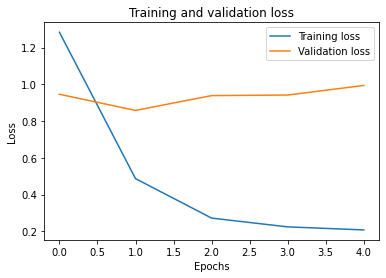

In [25]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

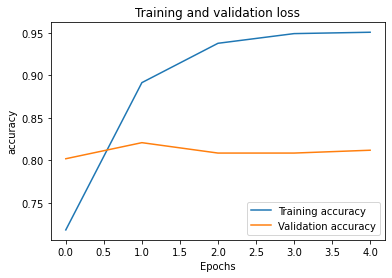

In [26]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()